<a href="https://colab.research.google.com/github/yasinazhdari/Auto-Encoders_-and-some-related-stuffs/blob/main/a_Basic_Auto_Encoder_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required packages and libraries.
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics  import accuracy_score, precision_score, recall_score
from sklearn.model_selection   import train_test_split
from tensorflow.keras import    layers, losses
from tensorflow.keras.datasets import    mnist
from tensorflow.keras.models   import    Model

In [ ]:
# to begin, we will train the basic autoencoder using the Fashion MNIST dataset. Each image in this dataset is 28x28 pixels.
(x_train, _), (x_test, _) = mnist.load_data()
print (type(x_train))
print (type(x_test ))

x_train = x_train.astype('float32') / 255
x_test  = x_test.astype('float32' ) / 255
print (x_train.shape)
print (x_test.shape )

11501568/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# To define the model, we will use the Keras Model Subclassing API.
latent_dim = 32 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__( )
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8,  (3, 3), activation='relu', padding='same', strides=2),
      layers.Flatten(),
      layers.Dense(256,activation='relu'),
      layers.Dense(latent_dim, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([                                 
      layers.Dense(256, activation='relu'),
      layers.Dense(7*7*8, activation='relu'),
      layers.Reshape((7,7,8)),                                  
      layers.Conv2DTranspose(8 , kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 


In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
# Next,to train the model using x_train as both the input and the target. The encoder will learn to compress the dataset from 784 dimensions to the latent space,
# and the decoder will learn to reconstruct the original images. 
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0355 - val_loss: 0.0175
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0150 - val_loss: 0.0129
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0120 - val_loss: 0.0107
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0092 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0088 - val_loss: 0.0085
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0085 - val_loss: 0.0081
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0083 - val_loss: 0.0080
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.008

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 flatten_1 (Flatten)         (None, 392)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               100608    
                                                                 
 dense_5 (Dense)             (None, 32)                8224      
                                                                 
Total params: 110,152
Trainable params: 110,152
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               8448      
                                                                 
 dense_7 (Dense)             (None, 392)               100744    
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 8)           0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 8)        584       
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 1)        

In [ ]:
# when the model is trained, let's test it by encoding and decoding images from 
# the test set.
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

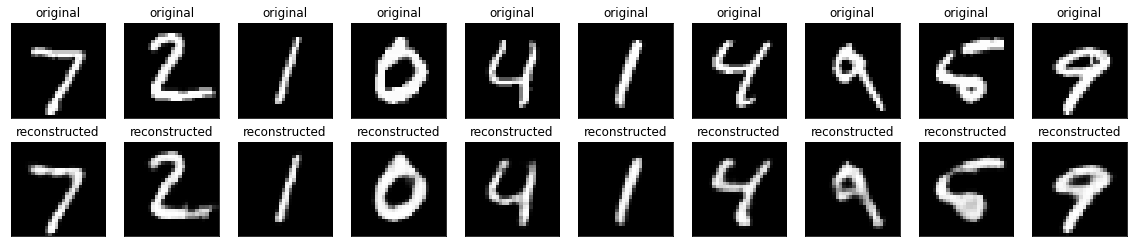

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].squeeze())
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()